### 1. Carregando a base


Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

In [40]:
# Importando as bibliotecas usadas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Carregando o arquivo usando o pandas com espaço em branco como separador
features = pd.read_csv("./UCI HAR Dataset/features.txt", sep='\s+', header=None)

# Mostra as primeiras linhas do DataFrame
features.head(2)

,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y


In [42]:
# Carregando o arquivo usando o pandas com espaço em branco como separador
subject_train = pd.read_csv("./UCI HAR Dataset/train/subject_train.txt", sep='\s+', header=None)

# Mostra as primeiras linhas do DataFrame
subject_train.head(2)

,0
0,1
1,1


In [43]:
# Carregando o arquivo usando o pandas com espaço em branco como separador
X_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", sep='\s+', header=None)

# Mostra as primeiras linhas do DataFrame
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317


In [44]:

# Definindo os nomes das colunas em X_train com base em features.txt
X_train.columns = features[1]

# Adicionando a coluna do subject_train como uma variável em X_train
X_train['Subject'] = subject_train[0]

# Criando um índice duplo composto pela ordem dos dados e pelo identificador do indivíduo
X_train = X_train.reset_index().set_index(['index', 'Subject'])

# Agora X_train possui os nomes de coluna corretos, a coluna Subject e um índice duplo.
X_train.head()

,1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
index,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [45]:
# Carregando o arquivo usando o pandas com espaço em branco como separador
subject_test = pd.read_csv("./UCI HAR Dataset/test/subject_test.txt", sep='\s+', header=None)

# Carregando o arquivo usando o pandas com espaço em branco como separador
X_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt", sep='\s+', header=None)

# Definindo os nomes das colunas em X_train com base em features.txt
X_test.columns = features[1]

# Adicionando a coluna do subject_test como uma variável em X_test
X_test['Subject'] = subject_test[0]

# Criando um índice duplo composto pela ordem dos dados e pelo identificador do indivíduo
X_test = X_test.reset_index().set_index(['index', 'Subject'])

# Agora X_test possui os nomes de coluna corretos, a coluna Subject e um índice duplo.
X_test.head()

,1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
index,Subject,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [46]:
# Carregando y_train e y_test

y_test = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", sep='\s+', header=None)
y_train = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", sep='\s+', header=None)

In [47]:
# Salvando o DataFrame X_train e X_test em um arquivo CSV no diretório 'output'
X_train.to_csv('output/X_train.csv')
X_test.to_csv('output/X_test.csv')

### 2. Ajustando uma árvore de decisão

In [48]:
%%time

# 2.1 Ajustando uma árvore de decisão com número mínimo de observações por folha = 20
# Usando apenas as 3 variáveis mencionadas
variables = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
X_train_subset = X_train[variables]  

clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)
clf.fit(X_train_subset, y_train) 

# 2.2 Calculando os ccp_alphas
path = clf.cost_complexity_pruning_path(X_train_subset, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Certificando que todos os valores são positivos
ccp_alphas = np.clip(ccp_alphas, 0, np.inf)

# Selecionando apenas valores únicos
ccp_alphas = np.unique(ccp_alphas)

# 2.3 Criando uma coleção de dados com os ccp_alphas, considerando apenas 1 a cada 5 valores
ccp_alphas_subset = ccp_alphas[::5]

# Criar árvores para cada valor de ccp_alpha na coleção
clfs = []
for ccp_alpha in ccp_alphas_subset:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha)
    clf.fit(X_train_subset, y_train)  # Ajustar a árvore com o valor específico de ccp_alpha
    clfs.append(clf)


CPU times: total: 2.5 s
Wall time: 4.64 s


### 3. Melhorando o desempenho da árvore por ccp_alpha

In [49]:
%%time 

# Usando apenas essas 19 variáveis 
variables = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X',	'tBodyAcc-std()-Y',	'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y',	'tBodyAcc-mad()-Z', 'fBodyBodyGyroJerkMag-meanFreq()',	'fBodyBodyGyroJerkMag-skewness()',	'fBodyBodyGyroJerkMag-kurtosis()',	'angle(tBodyAccMean,gravity)',	'angle(tBodyAccJerkMean),gravityMean)',	'angle(tBodyGyroMean,gravityMean)',	'angle(tBodyGyroJerkMean,gravityMean)',	'angle(X,gravityMean)',	'angle(Y,gravityMean)',	'angle(Z,gravityMean)']
X_train_subset = X_train[variables]  

# Rodando uma árvore para cada cp_alpha, salvando cada árvore em uma lista
clfs = []
for ccp_alpha in ccp_alphas_subset:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha)
    clf.fit(X_train_subset, y_train)  # Ajustar a árvore com o valor específico de ccp_alpha
    clfs.append(clf)



CPU times: total: 5.05 s
Wall time: 8.65 s


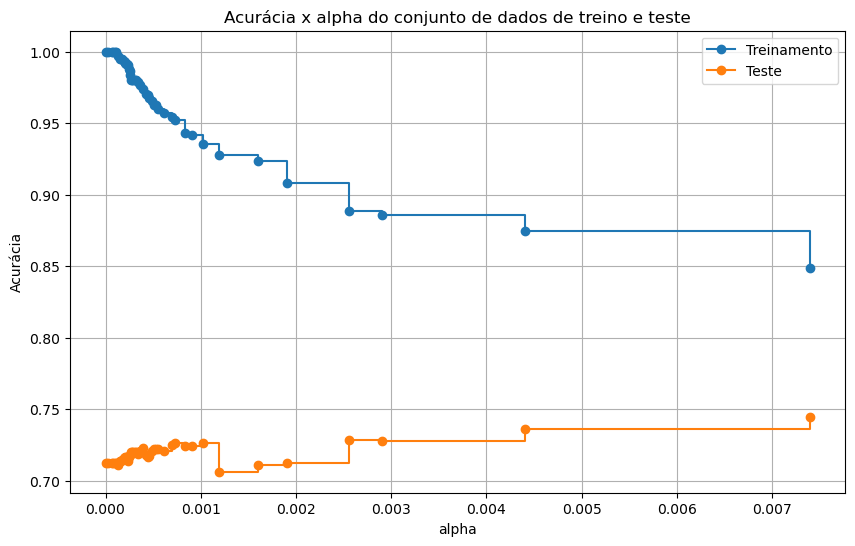

In [50]:
# Calculando a acurácia de treinamento e teste para cada árvore
train_scores = [clf.score(X_train_subset, y_train) for clf in clfs]
test_scores = [clf.score(X_test[variables], y_test) for clf in clfs]


# Visualizando a acurácia X alpha do conjunto de dados de treino e teste
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_subset, train_scores, marker='o', label="Treinamento", drawstyle="steps-post")
plt.plot(ccp_alphas_subset, test_scores, marker='o', label="Teste", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("Acurácia")
plt.title("Acurácia x alpha do conjunto de dados de treino e teste")
plt.legend()
plt.grid(True)
plt.show()

Selecionando a melhor árvore, mas se houverem empates, quero a que tenha a menor complexidade. Isso significa pegar a maior métrica de desempenho no objeto ```test_scores```, mas se houver empates, quero a primeira ocorrência desse máximo **da direita para a esquerda**.

In [51]:
# Pegando a 'melhor arvore' de acordo com os requisitos citados acima.
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

In [52]:
melhor_acuracia = max(test_scores)
print("Melhor acurácia com estas 19 variáveis:", melhor_acuracia)

Melhor acurácia com estas 19 variáveis: 0.7441465897522904


#### Avaliando o resultado<a name="3.3"></a>

Agora vou avaliar o resultado da nossa classificação utilizando a acrurácia, na base de testes. Para um visual um pouco melhor, vamos utilizar a matriz de confusão.

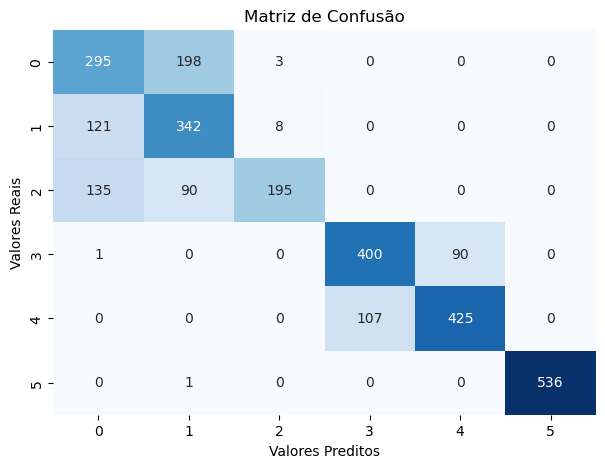

In [53]:
from sklearn.metrics import confusion_matrix

# Fazendo previsões no conjunto de teste
y_pred = melhor_arvore.predict(X_test[variables])

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plote a matriz de confusão como um heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

Nesta análise, treinamos uma série de **árvores de decisão** variando o parâmetro de complexidade **ccp_alpha** e usando um conjunto de três variáveis específicas. Calculamos as pontuações de acurácia para **cada árvore** em conjuntos de treinamento e teste e **visualizamos** essas pontuações em relação aos valores de ccp_alpha. Encontramos a **melhor árvore** com base na acurácia máxima nos dados de teste e concluímos que essa árvore, usando as **19 variáveis** selecionadas, alcançou uma acurácia de aproximadamente **74.41%** nos dados de teste, representando nosso melhor modelo de classificação.